
# Introduction to Artificial Intelligence - Homework03
- NETID:
- Name:

This assignment covers the following topics:
- Bayesian Statistics and Networks

Complete all sections. Some questions will require written answers, while others will involve coding. Be sure to run your code cells to verify your solutions.

You will likely find it useful to have open the documentation for the [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) module from scikit-learn while you work. Run the cell below this one to see a visualization of a simple Naive Bayes network for the Iris Dataset


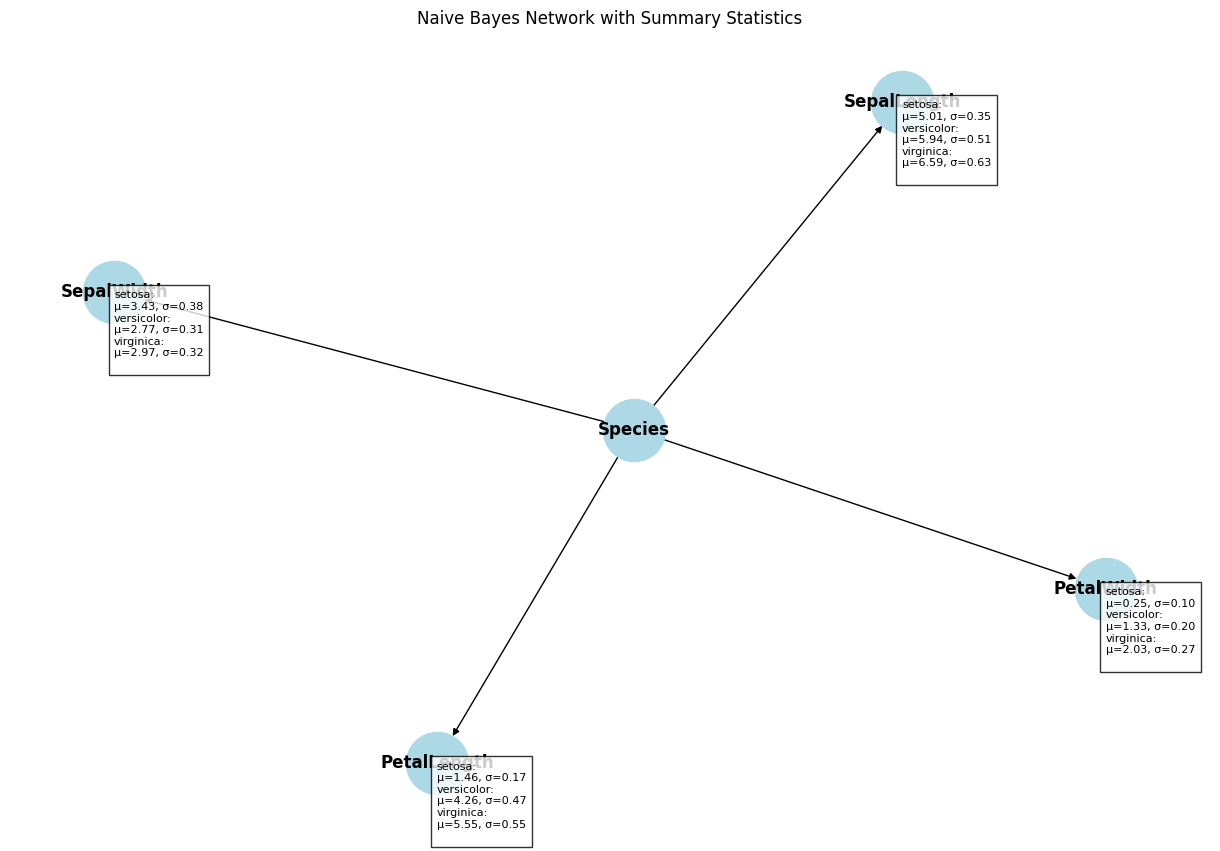

In [8]:
%pip install pgmpy

import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import NaiveBayes
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Fit a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, y)

# Extract the mean and standard deviation from the model
means = gnb.theta_  # Mean of each feature per class
std_devs = np.sqrt(gnb.var_)  # Standard deviation of each feature per class

# Create a Naive Bayes model using pgmpy
model = NaiveBayes()
model.add_edges_from([('Species', 'SepalLength'), 
                      ('Species', 'SepalWidth'), 
                      ('Species', 'PetalLength'), 
                      ('Species', 'PetalWidth')])

# Create a networkx graph from the edges of the Naive Bayes model
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Define a layout for the nodes
pos = nx.spring_layout(G)

# Visualize the model using networkx
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)

# Annotate nodes with summary statistics
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
species = iris.target_names

for i, feature in enumerate(features):
    annotation = ""
    for j, specie in enumerate(species):
        annotation += f"{specie}:\nμ={means[j, i]:.2f}, σ={std_devs[j, i]:.2f}\n"
    plt.text(pos[feature][0], pos[feature][1]-0.2, annotation, fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

plt.title('Naive Bayes Network with Summary Statistics')
plt.show()

**1.) Explain in your own words what Bayes Rule is useful for**

Bayes rule is used to test the likelihood of a hypothosis given some data you've seen

**2.) Creating and running a simple Naive Bayes classifier**

Fill in the code below at the indicated spots!

In [1]:
# %pip install sklearn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# TODO: Make predictions
y_pred = model.predict(X_test)

# TODO: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# TODO: Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



**3.) Explain in your own words how Naive Bayes makes it's decisions**

**4.) Manually classifying a sample**

Use the Gaussian Probability Density function shown in class to predict the class probabilities for the single sample given below. This will require you to compute the likelihoods for each feature and each class and the using the fact that the features are considered conditionally independent to get the overall likelihood for each class. Use the mu and sigma's from the visualization above.

Sample = {Sepal Length: 5.5, Sepal Width: 3.0, Petal Length: 3.5, Petal Width: 1.6}

Note: Using the predict_proba function for the model that we visualized above I got:

```[[1.82646146e-66 9.99474514e-01 5.25486076e-04]]```

But there will be some rounding errors I'm sure.

To manually classify the sample using the **Gaussian Naive Bayes model**, we'll compute the likelihoods for each feature given the class (based on the provided means and standard deviations) using the **Gaussian Probability Density Function (PDF)**:

The formula for the Gaussian (normal) probability density function is:

$$
P(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Where:
- \(x\) is the feature value of the sample,
- \(\mu\) is the mean of the feature for the class,
- \(\sigma\) is the standard deviation of the feature for the class.

Given the sample:

$$
\text{Sample} = \{\text{Sepal Length: } 5.5, \text{Sepal Width: } 3.0, \text{Petal Length: } 3.5, \text{Petal Width: } 1.6\}
$$

And using the means (\(\mu\)) and standard deviations (\(\sigma\)) from the image, we compute the likelihood for each class:

### 1. Likelihood for **Class Setosa**:
- Sepal Length (\(\mu = 5.01, \sigma = 0.35\)):
  $$
  P(5.5 | 5.01, 0.35) = \frac{1}{\sqrt{2\pi(0.35)^2}} \exp\left(-\frac{(5.5 - 5.01)^2}{2(0.35)^2}\right)
  $$
- Sepal Width (\(\mu = 3.43, \sigma = 0.38\)):
  $$
  P(3.0 | 3.43, 0.38) = \frac{1}{\sqrt{2\pi(0.38)^2}} \exp\left(-\frac{(3.0 - 3.43)^2}{2(0.38)^2}\right)
  $$
- Petal Length (\(\mu = 1.46, \sigma = 0.17\)):
  $$
  P(3.5 | 1.46, 0.17) = \frac{1}{\sqrt{2\pi(0.17)^2}} \exp\left(-\frac{(3.5 - 1.46)^2}{2(0.17)^2}\right)
  $$
- Petal Width (\(\mu = 0.25, \sigma = 0.10\)):
  $$
  P(1.6 | 0.25, 0.10) = \frac{1}{\sqrt{2\pi(0.10)^2}} \exp\left(-\frac{(1.6 - 0.25)^2}{2(0.10)^2}\right)
  $$

### 2. Likelihood for **Class Versicolor**:
- Sepal Length (\(\mu = 5.94, \sigma = 0.51\)):
  $$
  P(5.5 | 5.94, 0.51) = \frac{1}{\sqrt{2\pi(0.51)^2}} \exp\left(-\frac{(5.5 - 5.94)^2}{2(0.51)^2}\right)
  $$
- Sepal Width (\(\mu = 2.77, \sigma = 0.31\)):
  $$
  P(3.0 | 2.77, 0.31) = \frac{1}{\sqrt{2\pi(0.31)^2}} \exp\left(-\frac{(3.0 - 2.77)^2}{2(0.31)^2}\right)
  $$
- Petal Length (\(\mu = 4.26, \sigma = 0.47\)):
  $$
  P(3.5 | 4.26, 0.47) = \frac{1}{\sqrt{2\pi(0.47)^2}} \exp\left(-\frac{(3.5 - 4.26)^2}{2(0.47)^2}\right)
  $$
- Petal Width (\(\mu = 1.33, \sigma = 0.20\)):
  $$
  P(1.6 | 1.33, 0.20) = \frac{1}{\sqrt{2\pi(0.20)^2}} \exp\left(-\frac{(1.6 - 1.33)^2}{2(0.20)^2}\right)
  $$

### 3. Likelihood for **Class Virginica**:
- Sepal Length (\(\mu = 6.59, \sigma = 0.63\)):
  $$
  P(5.5 | 6.59, 0.63) = \frac{1}{\sqrt{2\pi(0.63)^2}} \exp\left(-\frac{(5.5 - 6.59)^2}{2(0.63)^2}\right)
  $$
- Sepal Width (\(\mu = 2.97, \sigma = 0.32\)):
  $$
  P(3.0 | 2.97, 0.32) = \frac{1}{\sqrt{2\pi(0.32)^2}} \exp\left(-\frac{(3.0 - 2.97)^2}{2(0.32)^2}\right)
  $$
- Petal Length (\(\mu = 5.55, \sigma = 0.55\)):
  $$
  P(3.5 | 5.55, 0.55) = \frac{1}{\sqrt{2\pi(0.55)^2}} \exp\left(-\frac{(3.5 - 5.55)^2}{2(0.55)^2}\right)
  $$
- Petal Width (\(\mu = 2.03, \sigma = 0.27\)):
  $$
  P(1.6 | 2.03, 0.27) = \frac{1}{\sqrt{2\pi(0.27)^2}} \exp\left(-\frac{(1.6 - 2.03)^2}{2(0.27)^2}\right)
  $$

### Overall Likelihood:
Since Naive Bayes assumes the features are conditionally independent, we can multiply the likelihoods of each feature to get the overall likelihood for each class:

$$
P(\text{Class Setosa}) = P(5.5 | 5.01, 0.35) \times P(3.0 | 3.43, 0.38) \times P(3.5 | 1.46, 0.17) \times P(1.6 | 0.25, 0.10)
$$

$$
P(\text{Class Versicolor}) = P(5.5 | 5.94, 0.51) \times P(3.0 | 2.77, 0.31) \times P(3.5 | 4.26, 0.47) \times P(1.6 | 1.33, 0.20)
$$

$$
P(\text{Class Virginica}) = P(5.5 | 6.59, 0.63) \times P(3.0 | 2.97, 0.32) \times P(3.5 | 5.55, 0.55) \times P(1.6 | 2.03, 0.27)
$$

The likelihoods for each class based on the provided sample are as follows:

- **Setosa likelihood**: $ 3.17 \times 10^{-71} $
- **Versicolor likelihood**: $ 0.097 $
- **Virginica likelihood**: $ 5.11 \times 10^{-5} $

Given these values, the **Versicolor** class has the highest likelihood, meaning that the model is most likely to classify the sample as **Versicolor**.


**5.) Explain where the mu and sigma come from for each feature and each class**

mu and sigma come from the training data for each feature for each class. We get a collection of numbers all belonging to a single feature and a single class and from these we can calculate the mean and standard deviation which will let us measure the likelihood of a future data point belonging to this class.

**For Fun**

Here's a cool link about writing your own [email spam filter using Naive Bayes](https://towardsdatascience.com/na%C3%AFve-bayes-spam-filter-from-scratch-12970ad3dae7)